+----+--------------+----------------------------+--------------+--------------+
|    |   Unnamed: 0 | errorReason                |   errorCount | dataCenter   |
+====+==============+============================+==============+==============+
|  0 |            0 | 404, Not Found             |         5817 | HeFei        |
+----+--------------+----------------------------+--------------+--------------+
|  1 |            1 | 504, Gateway timeout       |         3346 | HeFei        |
+----+--------------+----------------------------+--------------+--------------+
|  2 |            2 | 503, Service unavailable   |         2631 | HeFei        |
+----+--------------+----------------------------+--------------+--------------+
|  3 |            3 | 486, Too many requests     |         2263 | HeFei        |
+----+--------------+----------------------------+--------------+--------------+
|  4 |            4 | 406, Not Acceptable        |         2021 | HeFei        |
+----+--------------+-------

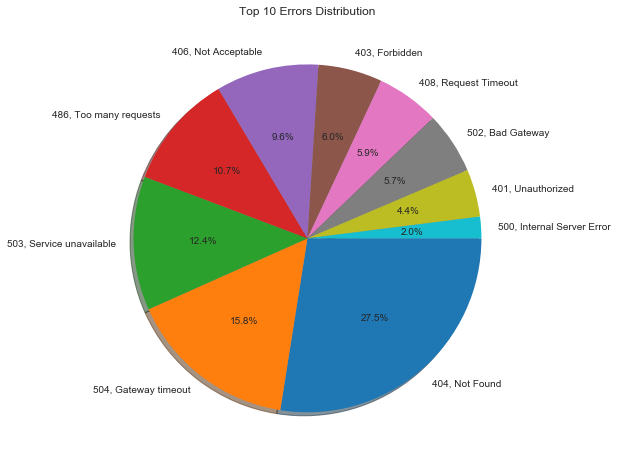

In [2]:
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt

def top_n_errors(df, topCount = 10):

    dfGroupByError = df.groupby(['errorReason'])['errorCount'].sum().reset_index()
    dfOfTopN = dfGroupByError.nlargest(topCount, 'errorCount', keep='first').reset_index(drop=True)
    print(tabulate(dfOfTopN, headers='keys', tablefmt="plain"))

    fig, ax = plt.subplots(figsize=(14, 8))
    plt.style.use('seaborn-whitegrid')
    plt.title('Top %d Errors Distribution' % topCount)
    plt.pie(dfOfTopN['errorCount'], labels=dfOfTopN['errorReason'], autopct='%1.1f%%', counterclock=False, shadow=True)

    plt.show()
    fig.savefig('top_n_errors.png')

if __name__ == '__main__':

    df = pd.read_csv('top_n_errors.csv')
    print(tabulate(df, headers='keys', tablefmt="grid"))
    top_n_errors(df)
